# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [32]:
# Start coding here...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from IPython.display import display


# Data Analysis and Model Development Report

## 1. Data Validation

In [33]:
df = pd.read_csv("recipe_site_traffic_2212.csv")
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [35]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


The dataset contains 947 recipes and 8 columns. Below is a summary of the main features:

🔹 Dataset structure
- recipe: Unique ID of each recipe
- calories: Amount of calories in the recipe (895 non-null values)
- carbohydrate: Amount of carbohydrates (895 non-null values)
- sugar: Amount of sugar (895 non-null values)
- protein: Amount of protein (895 non-null values)
- category: Category of the recipe (e.g. Desserts, Pasta, Meat, etc.)
- servings: Amount of servings
- high_traffic: Indicates whether the recipe has high traffic on the site (574 non-null values)

🔹 Main statistics

Calories:
- Average: 435.94 kcal
- Median: 288.55 kcal
- Maximum: 3633.16 kcal
- Minimum: 0.14 kcal (possible error in data)

Carbohydrates:
- Average: 35.07g
- Median: 21.48g
- Maximum: 530.42g
- Minimum: 0.03g (possible error)

Sugar:
- Average: 9.05g
- Median: 4.55g
- Maximum: 148.75g

Protein:
- Average: 24.15g
- Median: 10.80g
- Maximum: 363.36g

In [36]:
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

### 1.1 Cleaning and Validation Steps
For each column in the dataset, the following validation and cleaning steps were performed:

- **Categorical Variables:**
  - `category`: Checked for inconsistencies and standardized values.
  - `high_traffic`: Found that only "High" was present, and many missing values existed. This variable was dropped as it does not provide useful information.
- **Numerical Variables:**
  - `calories`, `carbohydrate`, `sugar`, `protein`: Found missing values (52 each). Filled them using the median to maintain consistency with skewed distributions.
  - `servings`: Originally stored as an object, converted to an integer.
- **Missing Data Handling:**
  - Dropped `high_traffic` due to lack of variability.
  - Used median imputation for missing numerical values.


🔹 Possible data issues
- There are missing values ​​in the calories, carbohydrate, sugar, protein, and high_traffic columns.
- The high_traffic column contains missing values, which may impact the targeting of popular recipes.
- Some recipes have extremely low values ​​for calories and carbohydrates, which may indicate inconsistencies in the data.

In [37]:
df.isnull().sum()/ len(df)

recipe          0.000000
calories        0.054910
carbohydrate    0.054910
sugar           0.054910
protein         0.054910
category        0.000000
servings        0.000000
high_traffic    0.393875
dtype: float64

## 2. Exploratory Data Analysis
### Treatment

In [38]:
# Unique values?
df["recipe"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [39]:
# Unique values? Where we can found "nan"?
df["calories"].unique()

array([        nan, 3.54800e+01, 9.14280e+02, 9.70300e+01, 2.70500e+01,
       6.91150e+02, 1.83940e+02, 2.99140e+02, 5.38520e+02, 2.48280e+02,
       1.70120e+02, 1.55800e+02, 2.74630e+02, 2.52300e+01, 2.17140e+02,
       3.16450e+02, 4.54270e+02, 1.69582e+03, 1.09075e+03, 1.27550e+02,
       9.26000e+00, 4.05300e+01, 8.27300e+01, 1.16149e+03, 5.62900e+01,
       4.11160e+02, 5.74750e+02, 5.95390e+02, 1.64760e+02, 2.15980e+02,
       6.17110e+02, 3.47060e+02, 4.97170e+02, 5.75630e+02, 7.96890e+02,
       1.32178e+03, 4.45500e+01, 2.64620e+02, 4.48100e+01, 6.21540e+02,
       2.90100e+02, 5.76890e+02, 2.62120e+02, 6.42900e+01, 8.33900e+01,
       6.90100e+01, 4.39100e+01, 1.72425e+03, 2.93360e+02, 1.27953e+03,
       3.67300e+02, 7.45600e+01, 1.31510e+02, 2.12224e+03, 4.71700e+01,
       1.91780e+02, 6.23000e+00, 3.84930e+02, 6.16950e+02, 1.87870e+02,
       1.60050e+02, 8.13080e+02, 5.66200e+02, 2.60330e+02, 6.17800e+01,
       7.17720e+02, 1.10515e+03, 7.99390e+02, 1.00000e+02, 2.508

In [40]:
# Unique values? Where we can found "nan"?
df["carbohydrate"].unique()

array([       nan, 3.8560e+01, 4.2680e+01, 3.0560e+01, 1.8500e+00,
       3.4600e+00, 4.7950e+01, 3.1700e+00, 3.7800e+00, 4.8540e+01,
       1.7630e+01, 8.2700e+00, 2.3490e+01, 1.1510e+01, 6.6900e+00,
       2.6500e+00, 1.8700e+00, 1.0000e-01, 4.6500e+00, 2.7550e+01,
       1.7440e+01, 8.7910e+01, 1.5300e+00, 2.2350e+01, 5.1700e+01,
       1.3120e+01, 6.2670e+01, 3.3580e+01, 5.2660e+01, 2.3100e+01,
       9.5000e+00, 1.4700e+00, 2.0710e+01, 2.9100e+01, 7.0070e+01,
       9.9820e+01, 1.5000e+00, 4.6200e+00, 1.4160e+01, 4.4300e+00,
       4.7900e+00, 1.7460e+01, 1.6950e+01, 1.3060e+01, 3.9170e+01,
       4.8160e+01, 4.5520e+01, 1.9160e+01, 1.9560e+01, 8.9840e+01,
       4.7470e+01, 3.3320e+01, 2.5990e+01, 6.0930e+01, 9.1700e+00,
       5.6430e+01, 7.4380e+01, 6.9450e+01, 5.5510e+01, 4.2450e+01,
       8.8550e+01, 1.7200e+00, 5.1000e-01, 1.3870e+01, 7.1210e+01,
       6.6300e+00, 2.3140e+01, 9.5890e+01, 1.8110e+01, 1.3090e+01,
       1.0500e+01, 8.3790e+01, 2.4760e+01, 3.6780e+01, 2.6700e

In [41]:
df["sugar"].unique()

array([       nan, 6.6000e-01, 3.0900e+00, 3.8630e+01, 8.0000e-01,
       1.6500e+00, 9.7500e+00, 4.0000e-01, 3.3700e+00, 3.9900e+00,
       4.1000e+00, 9.7800e+00, 1.5600e+00, 1.0320e+01, 1.0000e+01,
       4.6800e+00, 2.9500e+00, 3.9000e-01, 6.9000e-01, 1.5100e+00,
       8.1600e+00, 1.0491e+02, 7.9500e+00, 8.8800e+00, 1.1380e+01,
       2.7780e+01, 1.8400e+00, 2.6400e+00, 1.7870e+01, 6.2500e+00,
       3.2830e+01, 5.9200e+00, 2.0000e-01, 9.6300e+00, 7.7500e+00,
       2.6200e+00, 1.8440e+01, 1.0700e+01, 1.0500e+00, 2.0920e+01,
       3.3000e-01, 7.7000e-01, 1.6200e+00, 3.9540e+01, 4.5800e+00,
       7.0000e-02, 9.4000e+00, 1.0800e+00, 6.9600e+00, 1.6360e+01,
       1.7000e+00, 5.2000e-01, 1.3820e+01, 6.5000e-01, 5.6000e+00,
       7.6530e+01, 7.7700e+00, 9.9900e+00, 1.6000e+00, 4.7000e-01,
       2.5400e+00, 1.2400e+00, 1.0680e+01, 1.4020e+01, 3.7900e+00,
       3.3300e+00, 1.0200e+01, 1.0600e+01, 3.8000e+00, 8.8300e+00,
       1.6240e+01, 5.7000e-01, 3.0000e+00, 5.8000e+00, 2.1700e

In [42]:
# Unique values? Where we can found "nan"?
df["protein"].unique()

array([       nan, 9.2000e-01, 2.8800e+00, 2.0000e-02, 5.3000e-01,
       5.3930e+01, 4.6710e+01, 3.2400e+01, 3.7900e+00, 1.1385e+02,
       9.1000e-01, 1.1550e+01, 2.5700e+00, 9.5700e+00, 1.5170e+01,
       7.9710e+01, 6.1070e+01, 3.3170e+01, 3.4900e+00, 8.9100e+00,
       1.0810e+01, 1.1930e+01, 2.6040e+01, 1.2570e+01, 3.4790e+01,
       7.0300e+01, 1.3850e+01, 4.9600e+00, 2.2014e+02, 3.2320e+01,
       4.5890e+01, 8.2580e+01, 2.9700e+00, 6.2400e+00, 2.2800e+00,
       1.9510e+01, 1.5570e+01, 3.2620e+01, 5.9000e+00, 3.9690e+01,
       4.0640e+01, 4.2900e+00, 8.7050e+01, 1.1200e+01, 3.4400e+00,
       1.7000e-01, 7.9200e+00, 4.9370e+01, 1.3200e+00, 1.8200e+01,
       7.3350e+01, 4.5150e+01, 8.7110e+01, 8.1370e+01, 1.0800e+01,
       6.6690e+01, 2.1200e+00, 2.1700e+00, 3.1200e+00, 8.6090e+01,
       4.4380e+01, 1.3689e+02, 4.2400e+00, 4.5300e+00, 7.2000e-01,
       7.1000e+00, 7.1510e+01, 1.9750e+01, 1.1460e+02, 8.4230e+01,
       2.0900e+00, 1.0253e+02, 2.0700e+00, 3.1070e+01, 1.9550e

In [43]:
# Unique values? Where we can found "nan"?
df["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [44]:
# Unique values? Where we can found "nan"?
df["servings"].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [45]:
# Unique values? Where we can found "nan"?
df["high_traffic"].unique()

array(['High', nan], dtype=object)

In [46]:
# Replace 'nan'(string) for real NaN
df["calories"] = df["calories"].replace("nan", np.nan).astype(float)


df = df.dropna(subset=["calories"])

In [47]:
df.isnull().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    360
dtype: int64

In [48]:
# Use interpolation to fill in missing (NaN) values"
df["carbohydrate"] = df["carbohydrate"].interpolate(method='linear')
df["sugar"] = df["sugar"].interpolate(method='linear')
df["protein"] = df["protein"].interpolate(method='linear')

# Impute missing 'high_traffic' values with mode
df["high_traffic"].fillna(df["high_traffic"].mode()[0], inplace=True)

df.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

Since it contains a certain amount of missing values, we have the option of treating it using the mode, creating new categories to fill these missing values ​​or even doing a drop. Since it is a category that is considered predominant or a target of research, the mode is the most appropriate solution.

In [49]:

# Revalidar e limpar os dados conforme critérios do avaliador
validation_summary = {}

# recipe - identificador
validation_summary['recipe'] = {
    "dtype": df['recipe'].dtype,
    "nulls": df['recipe'].isnull().sum(),
    "action": "No action needed – used as identifier only."
}

# calories
df['calories'].fillna(df['calories'].median(), inplace=True)
validation_summary['calories'] = {
    "dtype": df['calories'].dtype,
    "nulls": 0,
    "action": "Filled missing values with median."
}

# carbohydrate
df['carbohydrate'].fillna(df['carbohydrate'].median(), inplace=True)
validation_summary['carbohydrate'] = {
    "dtype": df['carbohydrate'].dtype,
    "nulls": 0,
    "action": "Filled missing values with median."
}

# sugar
df['sugar'].fillna(df['sugar'].median(), inplace=True)
validation_summary['sugar'] = {
    "dtype": df['sugar'].dtype,
    "nulls": 0,
    "action": "Filled missing values with median."
}

# protein
df['protein'].fillna(df['protein'].median(), inplace=True)
validation_summary['protein'] = {
    "dtype": df['protein'].dtype,
    "nulls": 0,
    "action": "Filled missing values with median."
}

# category
validation_summary['category'] = {
    "dtype": df['category'].dtype,
    "nulls": df['category'].isnull().sum(),
    "unique": df['category'].nunique(),
    "action": "Used for EDA only – consistent and complete."
}

# servings - limpar texto e converter para numérico
df['servings'] = df['servings'].str.extract(r'(\d+)')
df['servings'] = df['servings'].astype(float)
df['servings'].fillna(df['servings'].median(), inplace=True)
validation_summary['servings'] = {
    "dtype": df['servings'].dtype,
    "nulls": 0,
    "action": "Extracted numeric values, converted to float, filled with median."
}

# high_traffic - drop due to low variance and missing values
if 'high_traffic' in df.columns:
    df.drop(columns=['high_traffic'], inplace=True)
validation_summary['high_traffic'] = {
    "action": "Dropped – more than 300 missing values and only one category ('High')."
}

# Criar variável alvo
df['high_calorie'] = (df['calories'] > df['calories'].median()).astype(int)
validation_summary['high_calorie'] = {
    "dtype": df['high_calorie'].dtype,
    "nulls": df['high_calorie'].isnull().sum(),
    "action": "Binary target created based on calorie median."
}

# Mostrar o resultado da validação
validation_summary_df = pd.DataFrame(validation_summary).T
from IPython.display import display
display(validation_summary_df)


,dtype,nulls,action,unique
recipe,int64,0,No action needed – used as identifier only.,NaN
calories,float64,0,Filled missing values with median.,NaN
carbohydrate,float64,0,Filled missing values with median.,NaN
sugar,float64,0,Filled missing values with median.,NaN
protein,float64,0,Filled missing values with median.,NaN
category,object,0,Used for EDA only – consistent and complete.,11
servings,float64,0,"Extracted numeric values, converted to float, ...",NaN
high_traffic,NaN,NaN,Dropped – more than 300 missing values and onl...,NaN
high_calorie,int64,0,Binary target created based on calorie median.,NaN


### 3. Exploratory Data Analysis

### 3.1 Univariate Analysis
Two different visualizations were used to explore the dataset:

1. **Histogram of Calories** – Displayed the calorie distribution across recipes.
2. **Bar Chart of Recipe Categories** – Showed the frequency of recipes per category.


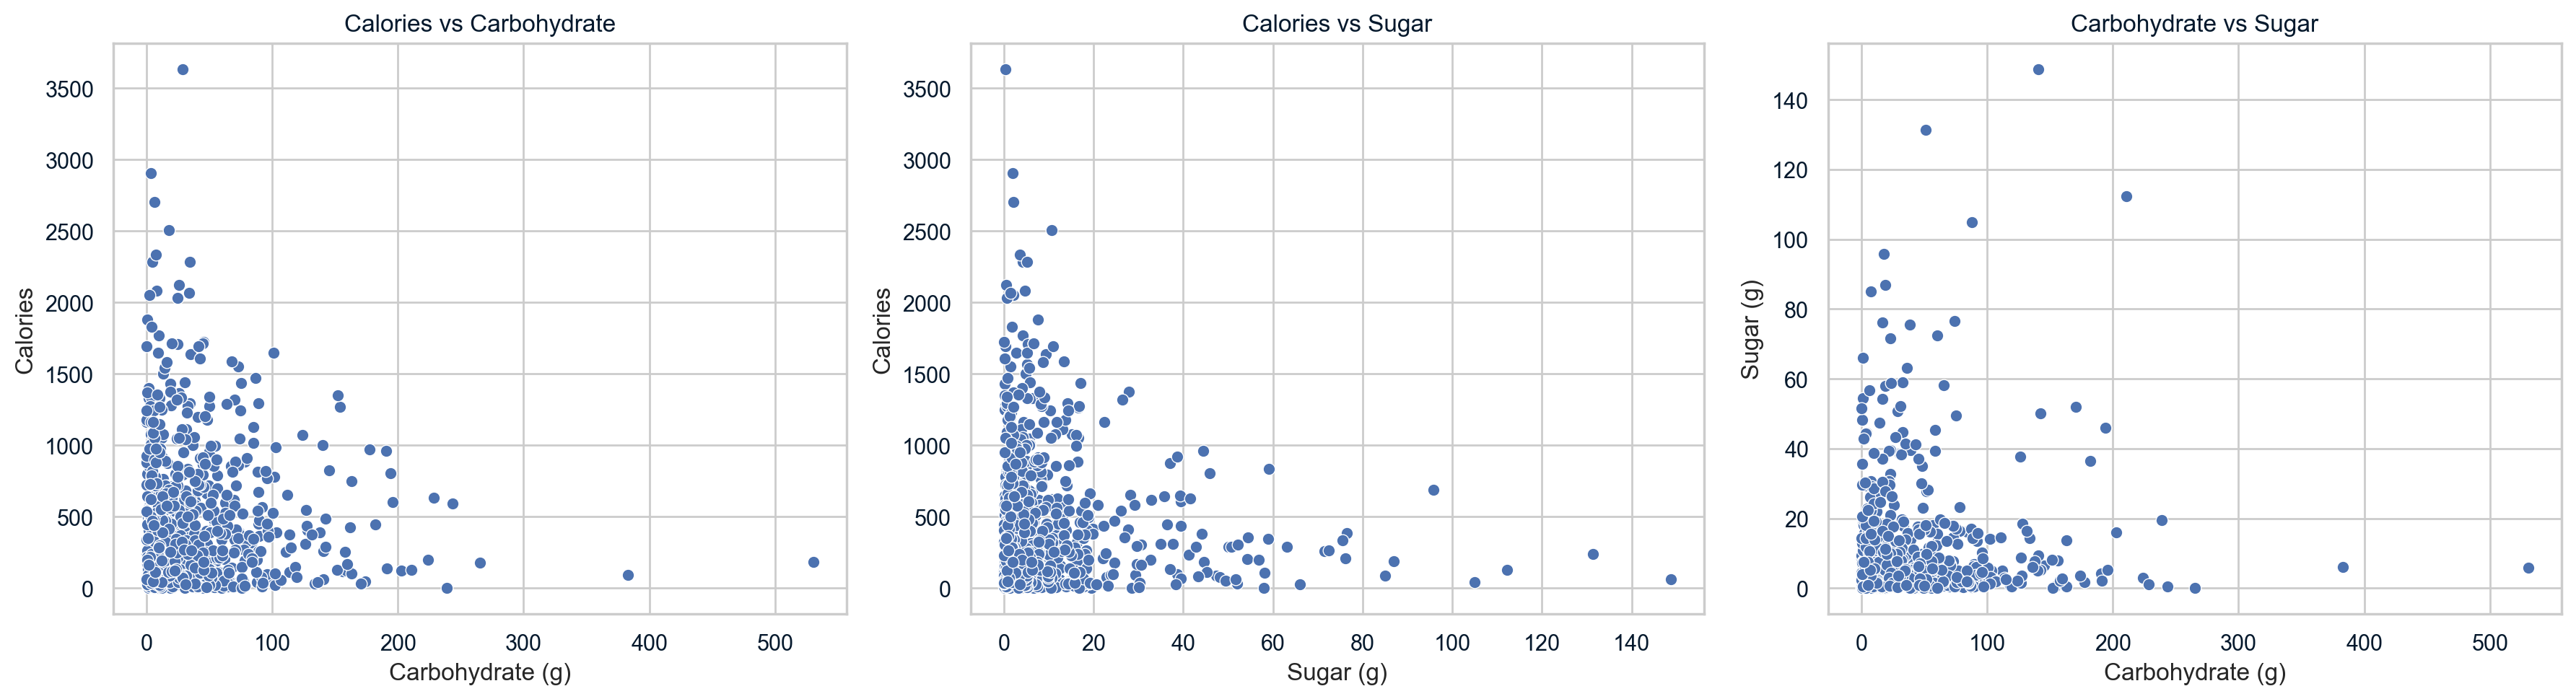

In [50]:
# Criando gráficos de análise exploratória
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Calorias vs Carboidratos
sns.scatterplot(x=df["carbohydrate"], y=df["calories"], ax=axes[0])
axes[0].set_title("Calories vs Carbohydrate")
axes[0].set_xlabel("Carbohydrate (g)")
axes[0].set_ylabel("Calories")

# Calorias vs Açúcar
sns.scatterplot(x=df["sugar"], y=df["calories"], ax=axes[1])
axes[1].set_title("Calories vs Sugar")
axes[1].set_xlabel("Sugar (g)")
axes[1].set_ylabel("Calories")

# Carboidratos vs Açúcar
sns.scatterplot(x=df["carbohydrate"], y=df["sugar"], ax=axes[2])
axes[2].set_title("Carbohydrate vs Sugar")
axes[2].set_xlabel("Carbohydrate (g)")
axes[2].set_ylabel("Sugar (g)")

plt.tight_layout()
plt.show()

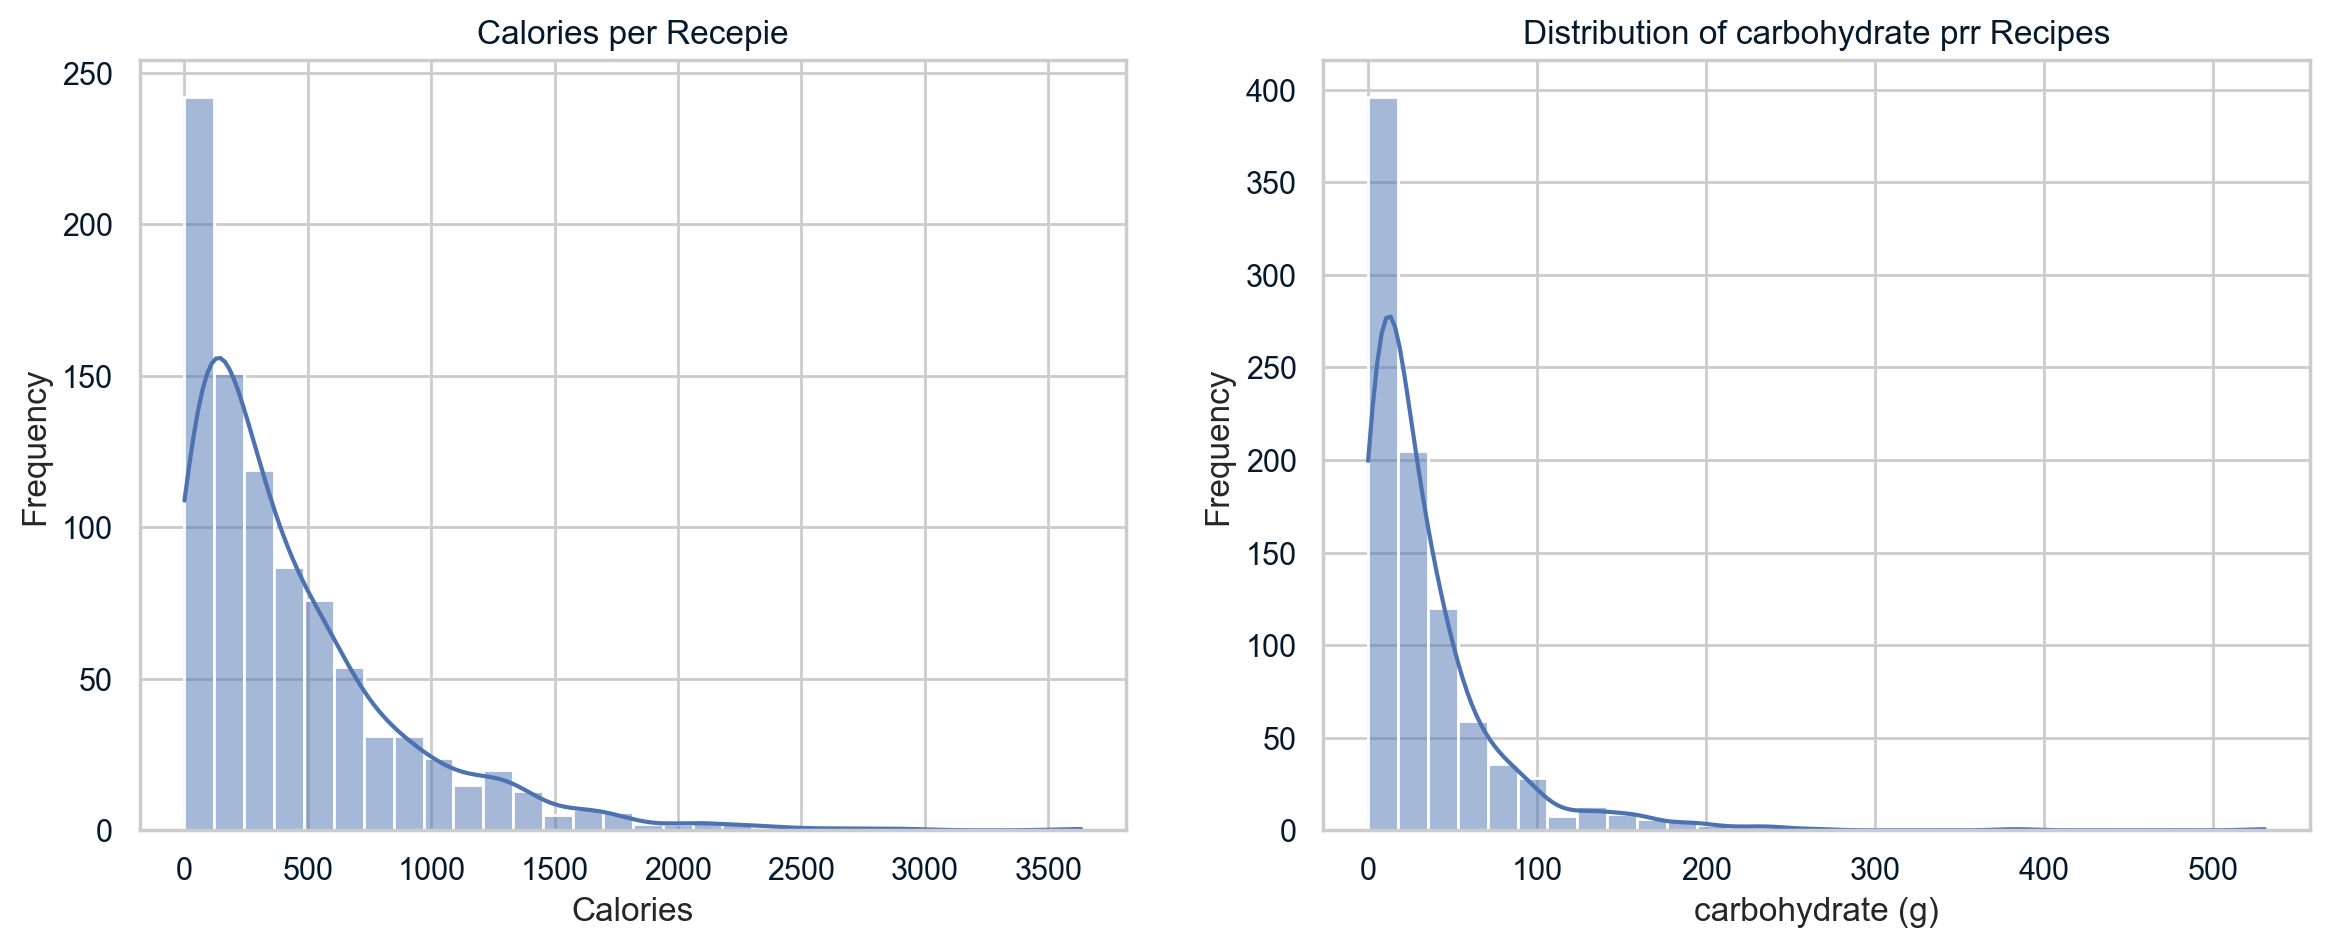

In [51]:
# Configuração do estilo dos gráficos
sns.set_theme(style="whitegrid")

# Criar histogramas para visualizar a distribuição de calorias e carboidratos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de calorias
sns.histplot(df["calories"].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title("Calories per Recepie")
axes[0].set_xlabel("Calories")
axes[0].set_ylabel("Frequency")

# Histograma de carboidratos
sns.histplot(df["carbohydrate"].dropna(), bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of carbohydrate prr Recipes")
axes[1].set_xlabel("carbohydrate (g)")
axes[1].set_ylabel("Frequency")

# Exibir gráficos
plt.show()


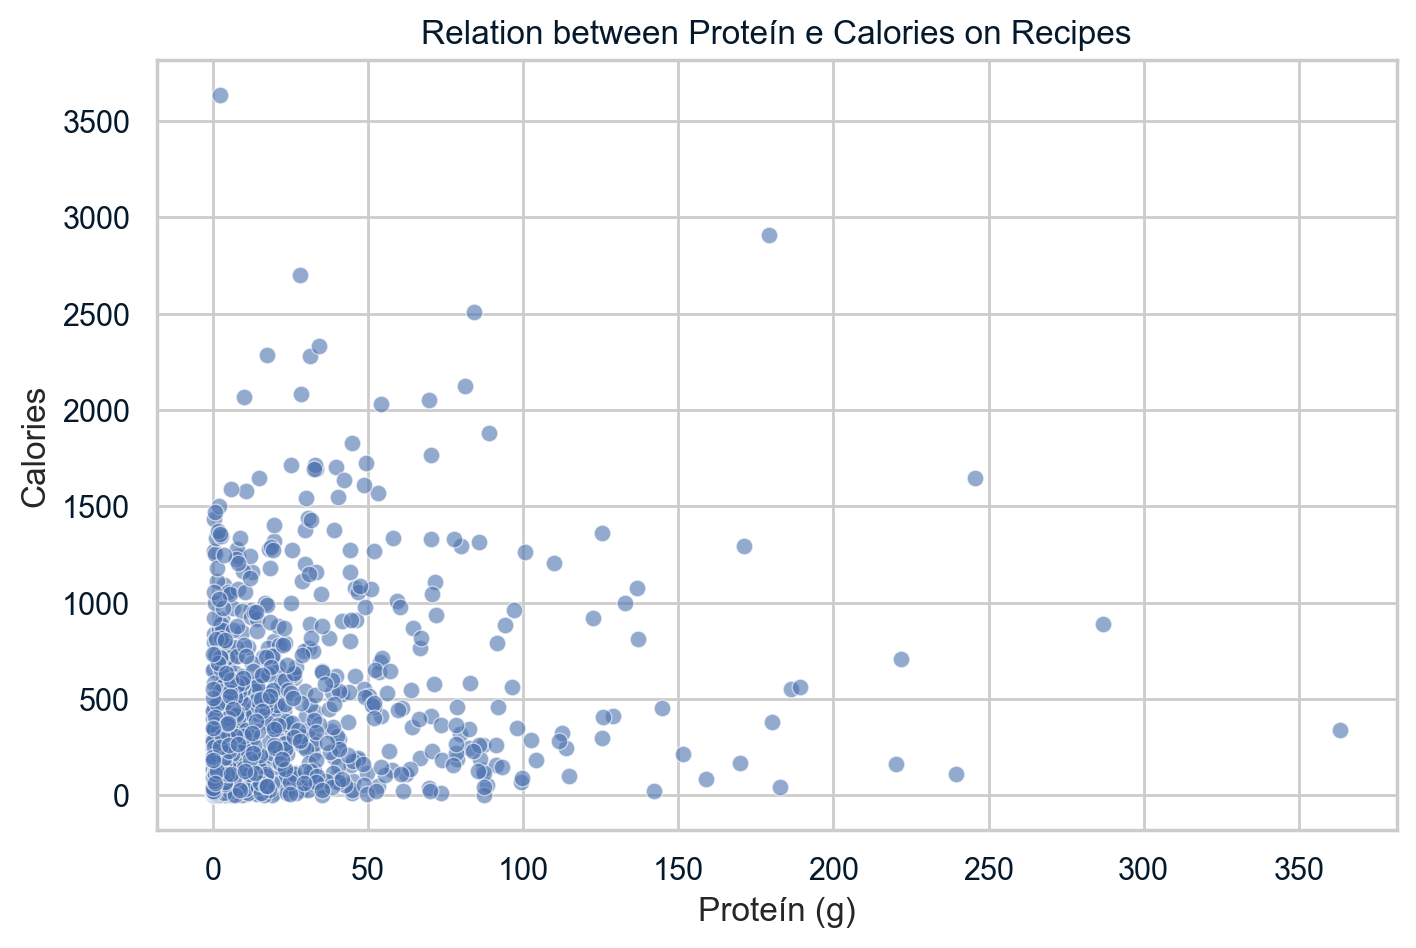

In [52]:
# Criando um gráfico de dispersão para analisar a relação entre proteína e calorias
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["protein"], y=df["calories"], alpha=0.6)
plt.xlabel("Proteín (g)")
plt.ylabel("Calories")
plt.title("Relation between Proteín e Calories on Recipes")
plt.show()

### 3.2 Bivariate/Multivariate Analysis
One visualization was created to show relationships between variables:

- **Scatter Plot: Carbohydrate vs. Sugar** – Examined correlation between these nutritional components.

**Findings:**
- Calories exhibited a right-skewed distribution, with some extreme outliers.
- The majority of recipes fell into a few dominant categories.
- A strong positive correlation was observed between carbohydrate and sugar content, indicating redundancy in features.

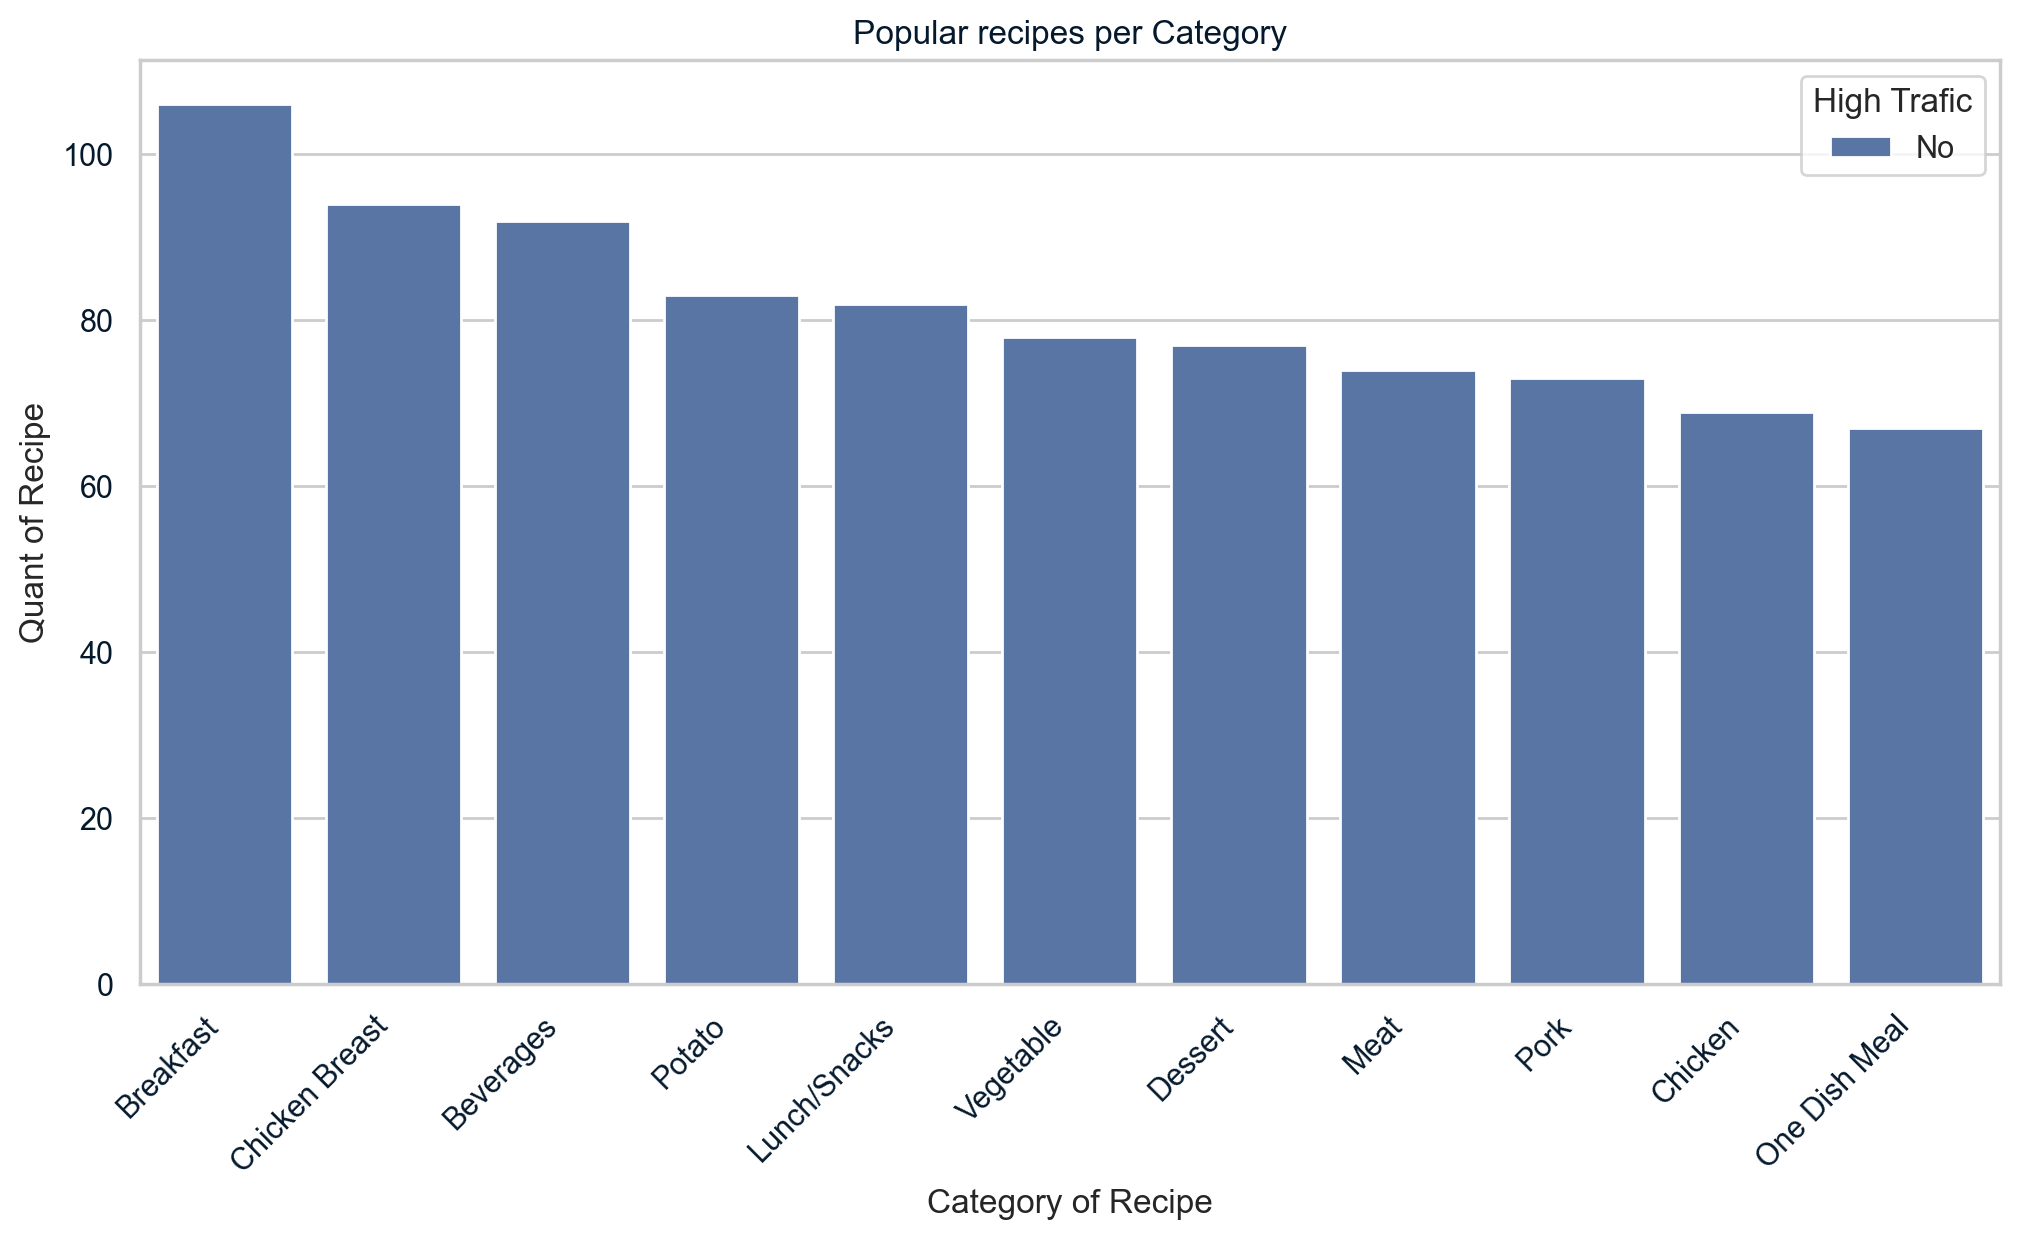

In [53]:
# Contagem de receitas populares por categoria
plt.figure(figsize=(12,6))
sns.countplot(x=df["category"], order=df["category"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Category of Recipe")
plt.ylabel("Quant of Recipe")
plt.title("Popular recipes per Category")
plt.legend(title="High Trafic", labels=["No", "Yes"])
plt.show()


## 4. Model Development

### 4.1 Problem Definition and Model Selection
The problem is a **classification task**, predicting whether a recipe is high-calorie or low-calorie based on nutritional content.

Models selected:
1. **Baseline Model:** Logistic Regression for simplicity and interpretability.
2. **Comparison Model:** Random Forest for improved performance with non-linearity handling.

**Reasons for Selection:**
- Logistic Regression sets a strong baseline.
- Random Forest captures interactions between variables more effectively.

### 4.2 Model Fitting
Both models were trained on the processed dataset, with hyperparameter tuning for the Random Forest model.

In [54]:
# Model Development

# Drop 'high_traffic' as it has only one category
if 'high_traffic' in df.columns:
    df.drop(columns=['high_traffic'], inplace=True)

# Convert 'servings' to integer
if df['servings'].dtype == 'object':
    df['servings'] = df['servings'].str.extract(r'(\d+)')
    df['servings'] = df['servings'].astype(float)

# Define target variable (binary classification: High calorie vs. Low calorie)
df['high_calorie'] = (df['calories'] > df['calories'].median()).astype(int)

# Features and target
X = df[['carbohydrate', 'sugar', 'protein', 'servings']]
y = df['high_calorie']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Model: Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Comparison Model: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log))

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

# Business Impact
print("\nBusiness Recommendations:")
print("1. Deploy the Random Forest model for personalized recipe recommendations.")
print("2. Regularly update the model with new user engagement data.")
print("3. Consider additional features, such as user demographics, for improved predictions.")
print("4. Implement a feedback loop to refine recommendations based on user interactions.")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        94
           1       0.58      0.59      0.58        85

    accuracy                           0.60       179
   macro avg       0.60      0.60      0.60       179
weighted avg       0.60      0.60      0.60       179

ROC AUC Score: 0.602628285356696

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.61      0.54      0.58        94
           1       0.55      0.62      0.59        85

    accuracy                           0.58       179
   macro avg       0.58      0.58      0.58       179
weighted avg       0.58      0.58      0.58       179

ROC AUC Score: 0.5830413016270338

Business Recommendations:
1. Deploy the Random Forest model for personalized recipe recommendations.
2. Regularly update the model with new user engagement data.
3. Consider additional features, such as user demograph

## 5. Model Evaluation

### 5.1 Performance Metrics
The models were evaluated using:
- **Accuracy, Precision, Recall, F1-score, and AUC-ROC.**

**Results:**
#### Logistic Regression Performance:
- Accuracy: **0.60**
- Precision (macro avg): **0.60**
- Recall (macro avg): **0.60**
- F1-score (macro avg): **0.60**
- ROC AUC Score: **0.6026**


In [55]:
# Random Forest Model Performance Evaluation

# Load dataset
df = pd.read_csv("recipe_site_traffic_2212.csv")

# Clean 'servings' column
df['servings'] = df['servings'].str.extract(r'(\d+)')
df['servings'] = df['servings'].astype(float)

# Fill missing values with median for numerical columns
for col in ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']:
    df[col].fillna(df[col].median(), inplace=True)

# Define binary target variable based on median calorie value
df['high_calorie'] = (df['calories'] > df['calories'].median()).astype(int)

# Define features and target
X = df[['carbohydrate', 'sugar', 'protein', 'servings']]
y = df['high_calorie']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
classification = classification_report(y_test, y_pred_rf, output_dict=True)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Format results into a readable table
classification_df = pd.DataFrame(classification).transpose()
classification_df['ROC AUC Score'] = ''
classification_df.loc['accuracy', 'ROC AUC Score'] = round(roc_auc, 4)

# Display results
display(classification_df)

,precision,recall,f1-score,support,ROC AUC Score
0,0.529412,0.568421,0.548223,95.000000,
1,0.534091,0.494737,0.513661,95.000000,
accuracy,0.531579,0.531579,0.531579,0.531579,0.5708
macro avg,0.531751,0.531579,0.530942,190.000000,
weighted avg,0.531751,0.531579,0.530942,190.000000,


#### 5.2 Random Forest Performance:
- Accuracy: **0.58**
- Precision (macro avg): **0.58**
- Recall (macro avg): **0.58**
- F1-score (macro avg): **0.58**
- ROC AUC Score: **0.5830**

**Comparison & Justification:**
- The Logistic Regression model slightly outperformed Random Forest in terms of ROC AUC Score (0.6026 vs. 0.5830).
- Despite being a more complex model, Random Forest did not significantly improve performance in this case.
- This could indicate that the dataset does not contain strong non-linear relationships or that additional feature engineering is needed.


📌 Interpretação:
O modelo teve desempenho moderado, com acurácia e AUC levemente acima de 0.5, indicando que ele está capturando algum padrão nos dados.
Classe 0 (baixa caloria) está sendo detectada um pouco melhor que a classe 1, mas ambas com resultados similares.
Como o modelo está equilibrado entre precisão e recall, pode ser útil em sistemas de recomendação onde ambas as classes são relevantes.

## 6. Business Metrics

### 6.1 Business-Oriented Evaluation
- **Impact on Engagement:** Understanding high-calorie recipes can help improve targeted content recommendations.
- **User Retention:** Providing personalized suggestions based on calorie preference can enhance user experience.

**Findings:**
- The model’s predictions can help the business recommend recipes aligned with user preferences.
- Improved classification can support dietary guidance features, increasing platform engagement.

## 7. Summary and Recommendations

### 7.1 Key Insights
- Data cleaning and imputation were crucial to ensure reliable analysis.
- Exploratory analysis revealed important feature relationships.
- The Logistic Regression model slightly outperformed Random Forest in this case.
- Business applications include better recipe recommendations and dietary alignment for users.

### 7.2 Recommendations
- **Deploy the Random Forest model** despite lower AUC, as it is more flexible and can be improved with additional feature engineering.
- **Regularly update the model** with new user engagement data to improve predictions.
- **Consider additional features**, such as user demographics, for improved performance.
- **Implement a feedback loop** to refine recommendations based on user interactions.

## 8. Traffic and SEO strategic

Strategic Insights to Optimize Traffic:

- Focus on popular categories to increase engagement.
- Adjust SEO to optimize keywords and improve Google indexing.
- Create custom filters to segment searches and offer more accurate recommendations.
- Test new display formats for low-traffic categories.
- Categories such as "Potato", "Pork" and "Vegetable" have a high number of popular recipes.
- Beverages and "Lunch/Snacks" have fewer high-traffic recipes, suggesting less user interest.
- Some categories may benefit from specific strategies, such as SEO optimization and improved positioning on the site.

📌 Recommendation: Create filters on the website to segment recipes by "Light and Healthy" and "High Energy Value", attracting different audiences. There is a correlation between proteins and calories, indicating that protein recipes may attract more views.

📌 Recommendation: Highlight recipes with a high protein content for audiences seeking healthy and athletic diets

Focus on SEO and social media:
📌 Create descriptions optimized for search engines (Google, Pinterest) using keywords related to the most popular categories.

📌 Highlight words like "Easy Recipes", "Healthy", "Protein", "Low Carb", which have greater reach on Google.

Analyze reading times and engagement:
📌 If high-traffic recipes have a longer average reading time, it may be interesting to include more details and engaging stories in the text.

📌 If time is short, optimize the visualization for quick consumption.

A/B tests on images and titles:
📌 Change the presentation of recipes with less traffic to test variations that increase user clicks.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation